<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/5%EC%A3%BC%EC%B0%A8/regressor_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 회귀 모델 실습

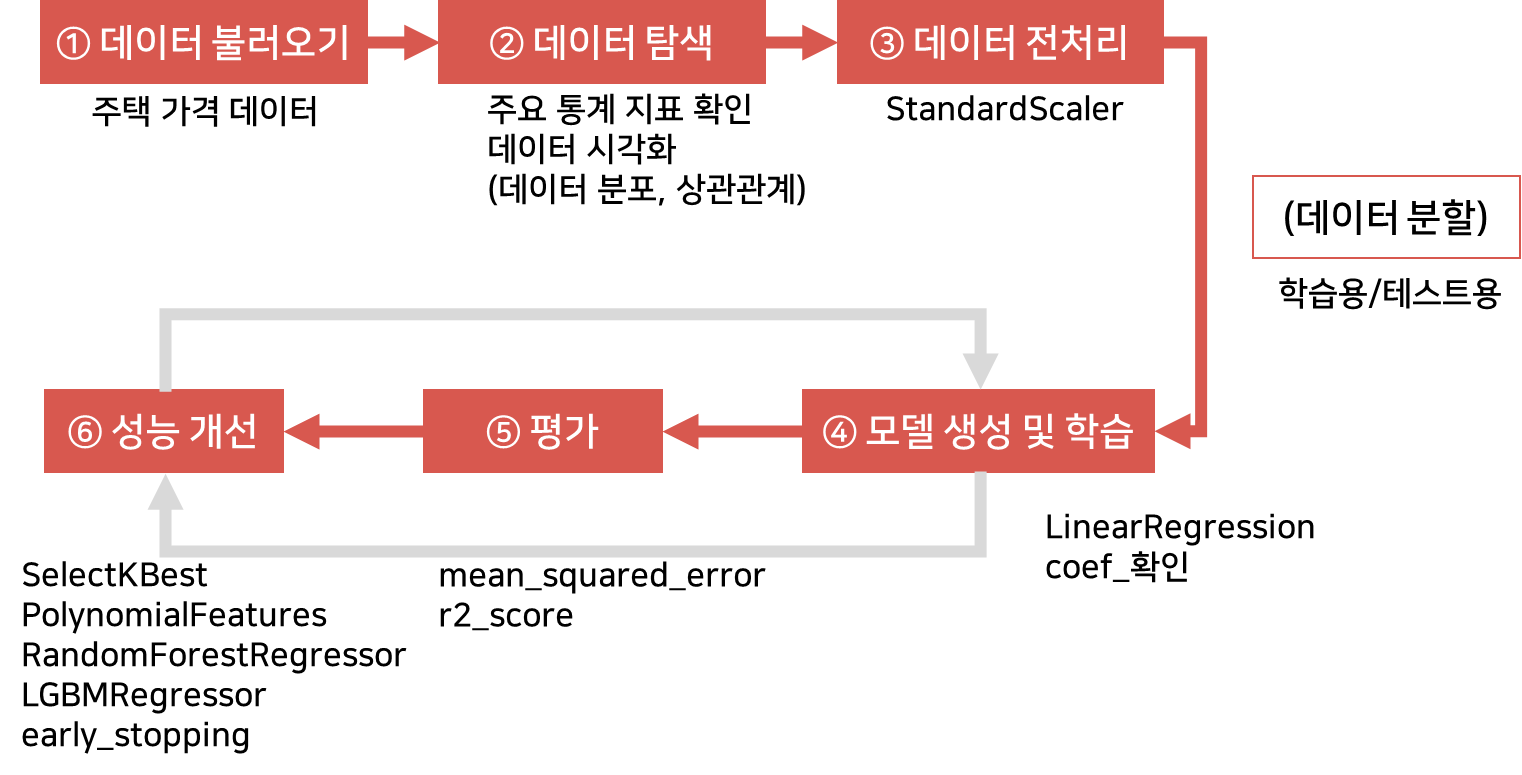

In [1]:
# 나눔폰트 설치(설치 후, 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') #한글폰트 설정
plt.rc('axes', unicode_minus=False) #마이너스 기호 표시

## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/zzhining/python_ml_dl/main/dataset/exercise4.csv', index_col=None)
df.head()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
0,83.910,16.0,67.021277,31.346578,34.8
1,88.920,24.0,55.319149,38.714128,36.6
2,95.925,96.0,80.851064,31.843267,43.4
3,100.170,16.0,36.170213,12.527594,57.2
4,92.430,8.0,22.340426,15.728477,48.2


## 데이터 탐색

In [4]:
df.describe()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,94.228740,37.976000,62.238298,30.096302,45.058000
std,10.544196,34.710359,23.038239,19.632020,18.237724
min,53.415000,4.000000,0.000000,0.000000,10.000000
25%,88.245000,16.000000,50.797872,14.514349,34.200000
50%,93.127500,20.000000,68.085106,26.572848,42.400000
75%,99.307500,96.000000,80.851064,41.901214,50.000000
max,131.700000,96.000000,100.000000,100.000000,100.000000


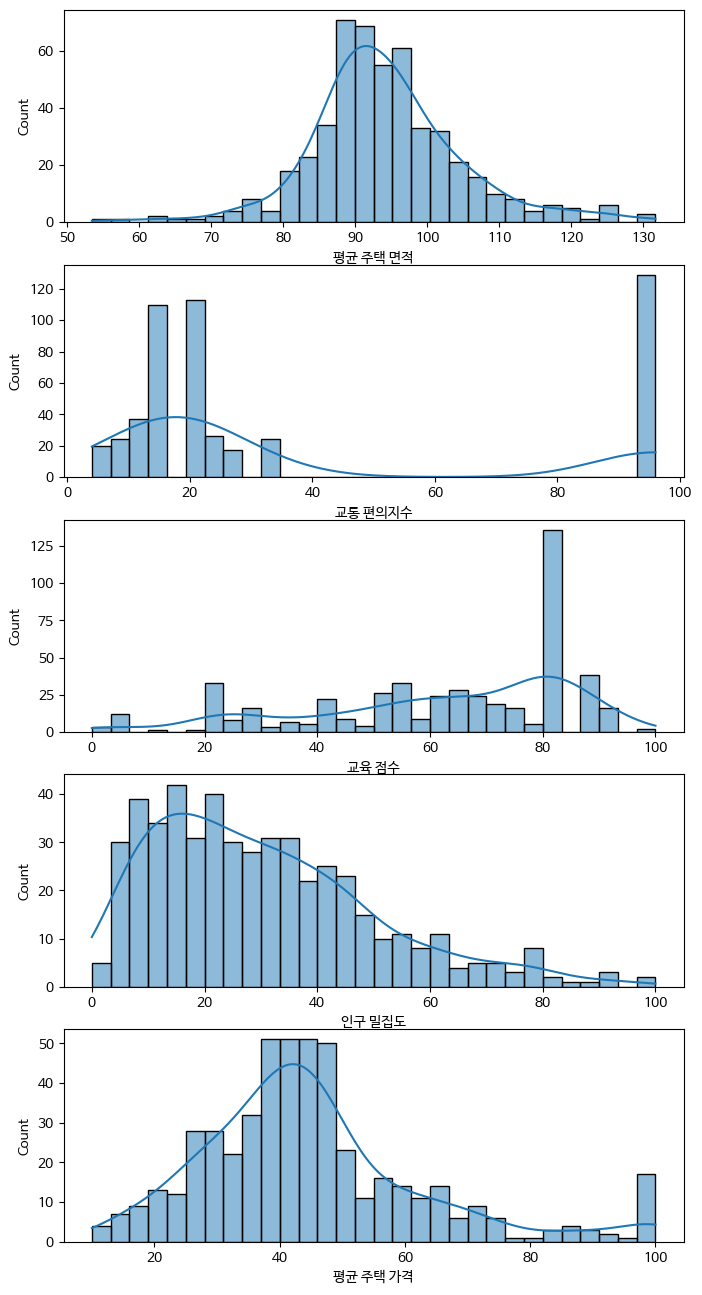

In [5]:
# 데이터 분포 확인 - 히스토그램
nrows = 5
ncols = 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(8, 16)

for i in range(len(df.columns)):
    sns.histplot(x=df.columns[i], data=df, kde=True, bins=30, ax=axs[i])

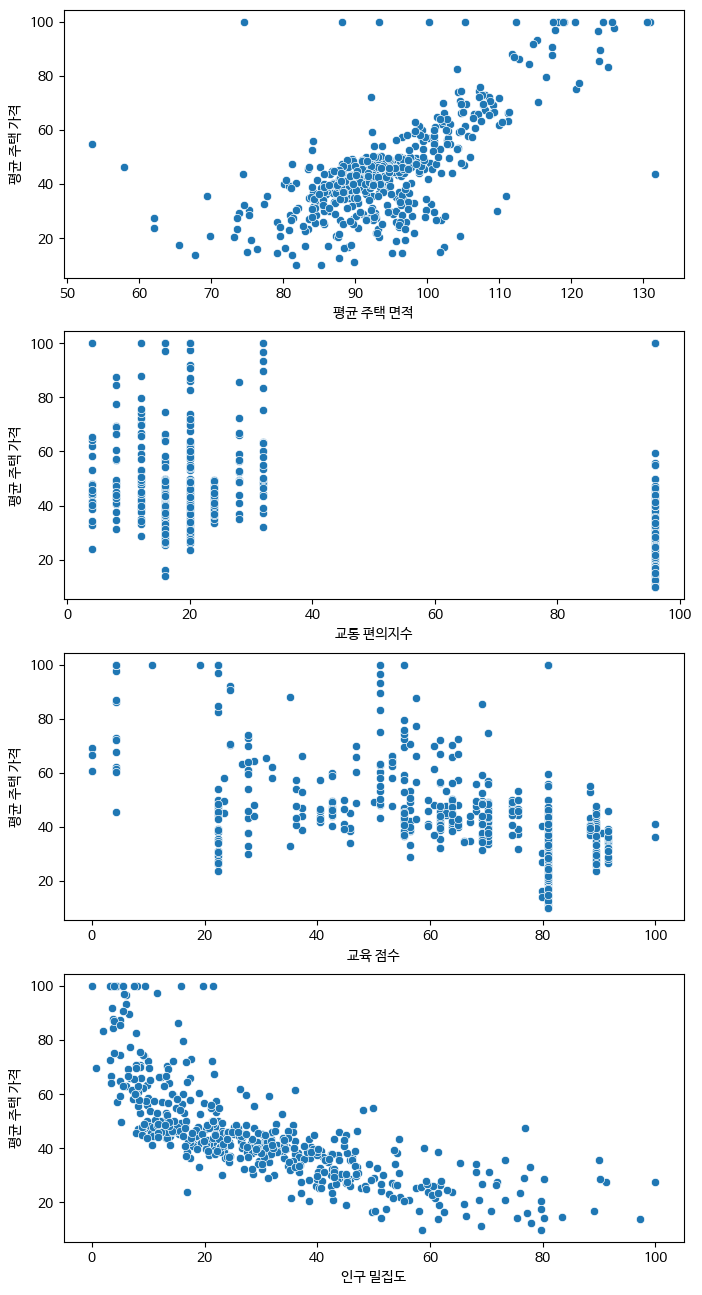

In [6]:
# 데이터 분포 확인 - 산점도
nrows = 4
ncols = 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(8, 16)

for i in range(len(df.columns) - 1):
    sns.scatterplot(x=df.columns[i], y='평균 주택 가격', data=df, ax=axs[i])

In [7]:
# 데이터 분포 확인 - 변수 간 상관관계
df.corr()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
평균 주택 면적,1.000000,-0.209952,-0.350765,-0.616391,0.694622
교통 편의지수,-0.209952,1.000000,0.462282,0.481111,-0.374742
교육 점수,-0.350765,0.462282,1.000000,0.368140,-0.500726
인구 밀집도,-0.616391,0.481111,0.368140,1.000000,-0.734713
평균 주택 가격,0.694622,-0.374742,-0.500726,-0.734713,1.000000


<Axes: >

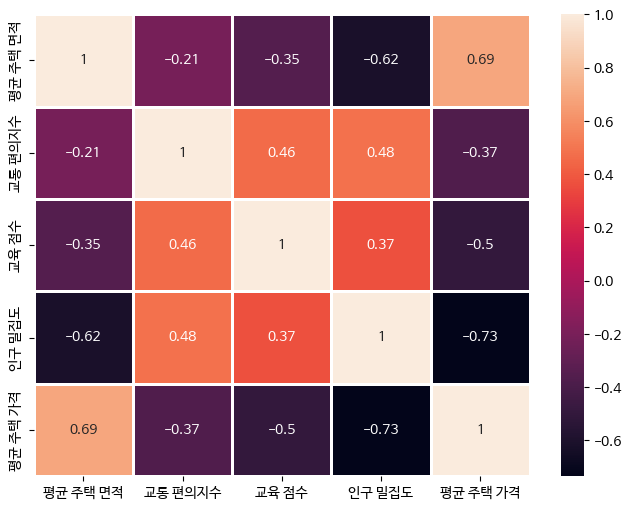

In [8]:
# 데이터 분포 확인 - 변수 간 상관관계(히트맵)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), linewidths=1, annot=True)

In [9]:
np.abs(df.corr()['평균 주택 가격']).sort_values(ascending=False)

평균 주택 가격    1.000000
인구 밀집도      0.734713
평균 주택 면적    0.694622
교육 점수       0.500726
교통 편의지수     0.374742
Name: 평균 주택 가격, dtype: float64

In [10]:
df.sort_values(by=['평균 주택 가격']).tail()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
273,105.240,96.0,80.851064,3.394040,100.0
285,118.125,16.0,19.148936,3.421634,100.0
385,112.335,20.0,22.340426,0.000000,100.0
253,125.625,20.0,22.340426,4.387417,100.0
426,93.240,96.0,80.851064,21.523179,100.0


In [11]:
# 결측값 확인
df.isna().sum()

평균 주택 면적    0
교통 편의지수     0
교육 점수       0
인구 밀집도      0
평균 주택 가격    0
dtype: int64

In [12]:
# 중복값 확인
df.duplicated().sum()

0

## 데이터 전처리

In [13]:
y = df['평균 주택 가격']
X = df.drop(['평균 주택 가격'],axis=1,inplace=False)

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 학습

In [16]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [ 8.37360226 -0.68007229 -3.48014443 -6.39361632]
bias: 44.97676980530395


In [17]:
coef = pd.Series(data=np.round(lr_model.coef_, 1), index=X.columns )
coef

평균 주택 면적    8.4
교통 편의지수    -0.7
교육 점수      -3.5
인구 밀집도     -6.4
dtype: float64

<Axes: >

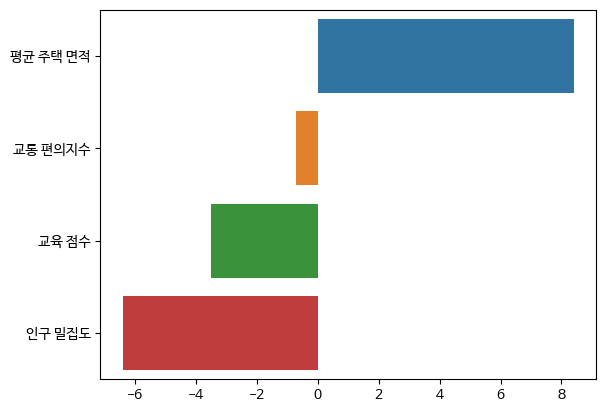

In [18]:
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 평가

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'
    .format(mse , rmse, r2))

y_pred = lr_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 138.472 , RMSE : 11.767, r2 : 0.560


In [20]:
result = pd.DataFrame({'y': y_test.values, 
                       'y_pred': y_pred, 
                       'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False).head()

,y,y_pred,diff
76,100.0,33.815985,66.184015
149,100.0,43.033172,56.966828
43,55.0,13.542672,41.457328
12,27.6,-7.328432,34.928432
109,46.2,11.557502,34.642498


## 성능개선


### ① 독립변수 선택

In [21]:
from sklearn.feature_selection import SelectKBest, f_regression

# k = 3
X_selected = SelectKBest(score_func = f_regression, k = 3)
X_selected.fit_transform(X, y)
features = X.columns[X_selected.get_support()]    
print('features = {}'.format(features))

features = Index(['평균 주택 면적', '교육 점수', '인구 밀집도'], dtype='object')


In [22]:
X_selected = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 135.585 , RMSE : 11.644, r2 : 0.569


### ② 다항회귀(PolynomialFeatures)모델

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)   

MSE : 95.010 , RMSE : 9.747, r2 : 0.698


In [24]:
X_selected.columns

Index(['평균 주택 면적', '교육 점수', '인구 밀집도'], dtype='object')

### ③ 데이터 스케일 변환

평균 주택 면적    0.399375
교육 점수      -0.797798
인구 밀집도      0.921644
dtype: float64

평균 주택 가격: 1.11


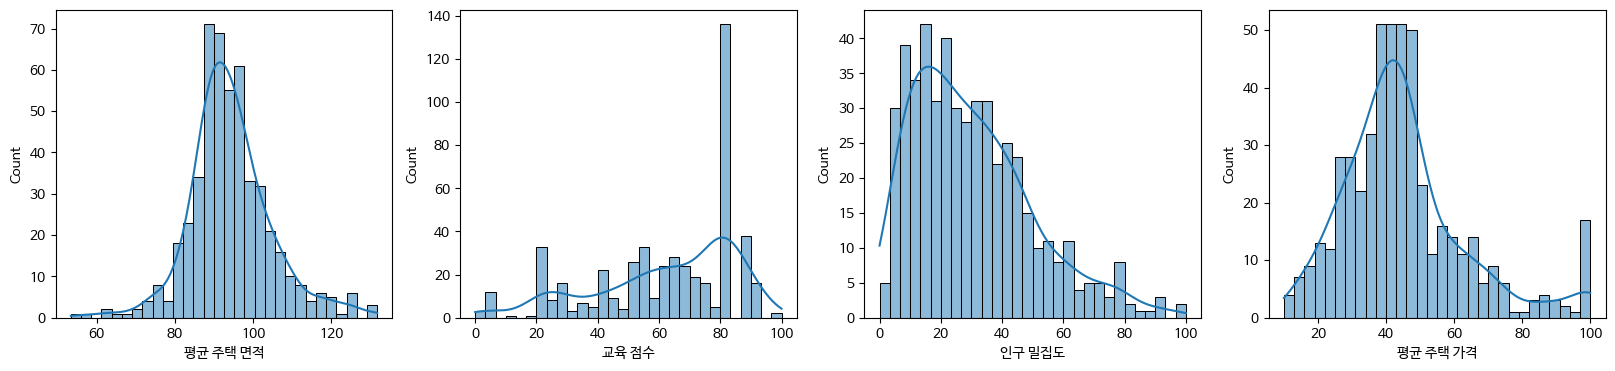

In [25]:
# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n평균 주택 가격: {0:.2f}'.format(y.skew()))

평균 주택 면적    0.399375
교육 점수      -0.797798
인구 밀집도     -0.663896
dtype: float64

평균 주택 가격: -0.30


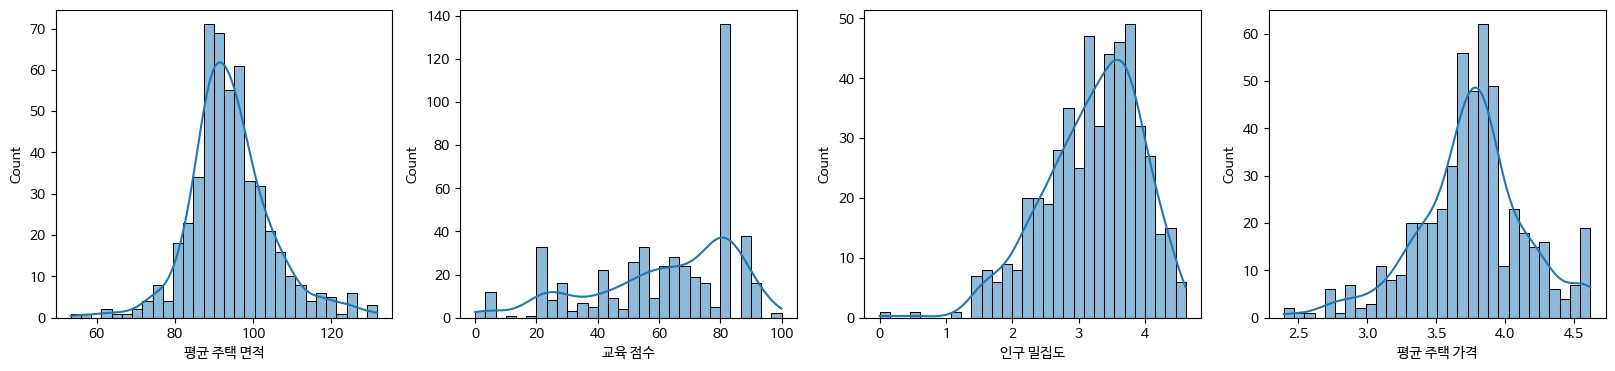

In [26]:
X_selected['인구 밀집도'] = np.log1p(X_selected['인구 밀집도'])
y = np.log1p(y)

# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n평균 주택 가격: {0:.2f}'.format(y.skew()))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3 = LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test) 
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

MSE : 90.757 , RMSE : 9.527, r2 : 0.711


### (Tip) 교차검증(cross_validate)

In [28]:
from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습 
scores = cross_validate(lr_model, X, y, scoring="neg_mean_squared_error", cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse = (-1 * scores['train_score'])
print('MSE:', mse)

rmse  = np.sqrt(-1 * scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균: {0:.3f} '.format(np.mean(rmse)))

Scores {'fit_time': array([0.00354719, 0.01361012, 0.01227093]), 'score_time': array([0.00930929, 0.00186062, 0.00133109]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-0.03280526, -0.0446345 , -0.05962279]), 'train_score': array([-0.05095414, -0.04485816, -0.03722167])}
MSE: [0.05095414 0.04485816 0.03722167]
RMSE: [0.22573024 0.21179746 0.19292918]
RMSE 평균: 0.210 


### ④ 의사결정나무 기반 회귀 모델

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [31]:
model_list = [lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    model_name = model.__class__.__name__
    print('{0} MSE : {1:.3f} , RMSE : {2:.3f}, r2 : {3:.3f}'.format(model_name, mse , rmse, r2)) 

LinearRegression MSE : 0.053 , RMSE : 0.230, r2 : 0.664
RandomForestRegressor MSE : 0.045 , RMSE : 0.213, r2 : 0.711
LGBMRegressor MSE : 0.043 , RMSE : 0.208, r2 : 0.726


In [32]:
from lightgbm import LGBMRegressor

lgb_model2 = LGBMRegressor(n_estimators=100)
evals = [(X_train , y_train), (X_test, y_test)]
lgb_model2.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals)
y_preds = lgb_model2.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

[1]	training's l2: 0.130207	valid_1's l2: 0.140792
[2]	training's l2: 0.111443	valid_1's l2: 0.123662
[3]	training's l2: 0.0962306	valid_1's l2: 0.110144
[4]	training's l2: 0.0832024	valid_1's l2: 0.0981787
[5]	training's l2: 0.072626	valid_1's l2: 0.0879888
[6]	training's l2: 0.0639309	valid_1's l2: 0.0795655
[7]	training's l2: 0.0567257	valid_1's l2: 0.0725655
[8]	training's l2: 0.0508983	valid_1's l2: 0.0669315
[9]	training's l2: 0.046329	valid_1's l2: 0.062832
[10]	training's l2: 0.0423744	valid_1's l2: 0.0589452
[11]	training's l2: 0.0391376	valid_1's l2: 0.0559824
[12]	training's l2: 0.0364656	valid_1's l2: 0.053285
[13]	training's l2: 0.034328	valid_1's l2: 0.0513694
[14]	training's l2: 0.0324794	valid_1's l2: 0.0495952
[15]	training's l2: 0.0310551	valid_1's l2: 0.0483466


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[16]	training's l2: 0.0297747	valid_1's l2: 0.0471333
[17]	training's l2: 0.0287265	valid_1's l2: 0.0461315
[18]	training's l2: 0.0278883	valid_1's l2: 0.0457071
[19]	training's l2: 0.0270548	valid_1's l2: 0.0452014
[20]	training's l2: 0.0264012	valid_1's l2: 0.0448668
[21]	training's l2: 0.0258097	valid_1's l2: 0.0444261
[22]	training's l2: 0.025332	valid_1's l2: 0.044051
[23]	training's l2: 0.0249048	valid_1's l2: 0.0438124
[24]	training's l2: 0.0244132	valid_1's l2: 0.0433313
[25]	training's l2: 0.0240243	valid_1's l2: 0.0430499
[26]	training's l2: 0.0236966	valid_1's l2: 0.0427309
[27]	training's l2: 0.0234307	valid_1's l2: 0.0425446
[28]	training's l2: 0.023171	valid_1's l2: 0.0423032
[29]	training's l2: 0.0228984	valid_1's l2: 0.0419103
[30]	training's l2: 0.0227264	valid_1's l2: 0.0418068
[31]	training's l2: 0.0225198	valid_1's l2: 0.0418751
[32]	training's l2: 0.0222824	valid_1's l2: 0.0415373
[33]	training's l2: 0.0220929	valid_1's l2: 0.0415462
[34]	training's l2: 0.0219235	v

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

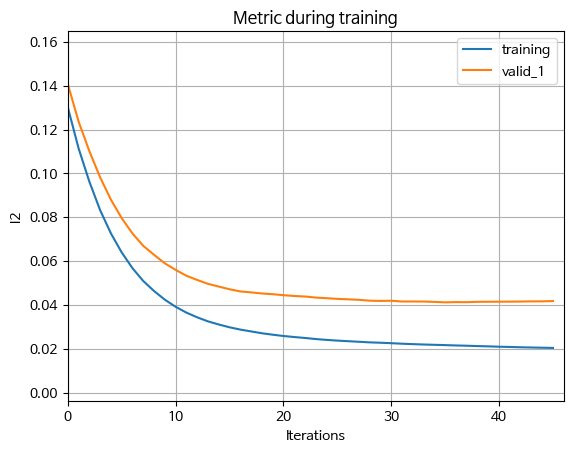

In [33]:
import lightgbm as lgb
lgb.plot_metric(lgb_model2)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

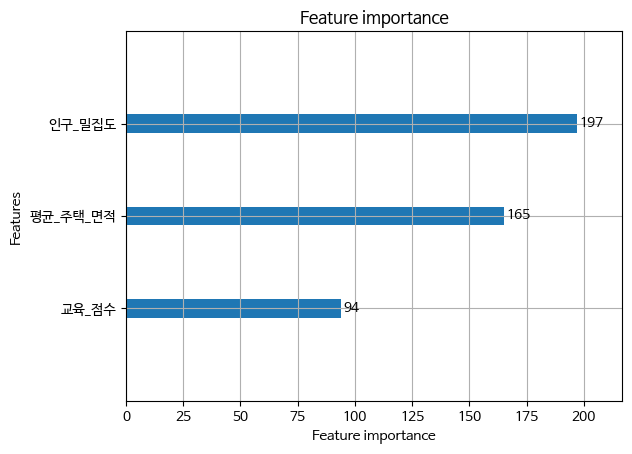

In [34]:
lgb.plot_importance(lgb_model2)